### Alunos:
##### Felipe Leão, Rafael Santos, Danilo Scheltes e Henrique Lyrio

Dataset utilizado: https://www.kaggle.com/datasets/gallo33henrique/bitcoin-btc-usd-stock-dataset?resource=download

O roteiro do tensorflow foi criado um miniprojeto de uma IA que faz a predição do preço do bitcoin em dolar, o dataset utilizado foi dividido em 2 partes
1. Treinamento, teste incial e salvar os pesos da rede neural
2. Um dataset com menos dados para fazer uma predição e testes com os pesos salvos

# Tensor Flow

##Download do dataset

1. dataset.csv
2. datasetteste.csv

In [5]:
import gdown

# URL do arquivo compartilhado
url = 'https://drive.google.com/uc?id=1dPpMVTgZr3crG5FGmCSpjY453jeNVssx'

# Nome do arquivo de saída
output = 'dataset.csv'

# Baixando o arquivo
gdown.download(url, output, quiet=False)

url = 'https://drive.google.com/uc?id=1TXd2-9MtYvEXzXV94cc_pADnYmwBPL85'

# Nome do arquivo de saída
output = 'datasetteste.csv'

# Baixando o arquivo
gdown.download(url, output, quiet=False)

print("\nDownload concluído!")


Downloading...
From: https://drive.google.com/uc?id=1dPpMVTgZr3crG5FGmCSpjY453jeNVssx
To: /content/dataset.csv
100%|██████████| 251k/251k [00:00<00:00, 25.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TXd2-9MtYvEXzXV94cc_pADnYmwBPL85
To: /content/datasetteste.csv
100%|██████████| 31.4k/31.4k [00:00<00:00, 24.3MB/s]


Download concluído!


## 1. Carregar e Pré-processar os Dados

In [12]:
# 1. Carregar e Pré-processar os Dados
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

# Carregar o dataset
data = pd.read_csv('dataset.csv')

# Selecionar as colunas de interesse
features = data[['Open', 'High', 'Low', 'Close', 'Volume']].values
labels = data['Close'].values  # Para previsão de preço de fechamento

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Converter para tensores do TensorFlow
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)  # Sem ajuste de forma necessário
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)      # Sem ajuste de forma necessário


## 2. Definir a Arquitetura do Modelo

In [13]:
# 2. Definir a Arquitetura do Modelo
# Definição da arquitetura da rede
input_size = X_train.shape[1]
hidden_size1 = 256  # Aumentar o número de neurônios na primeira camada
hidden_size2 = 128
hidden_size3 = 64
hidden_size4 = 32
hidden_size5 = 16
output_size = 1  # Para previsão de preço de fechamento (regressão)

# Definir o modelo usando Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_size1, activation='relu', input_shape=(input_size,)),
    tf.keras.layers.Dropout(0.3),  # 30% de dropout
    tf.keras.layers.Dense(hidden_size2, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(hidden_size3, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(hidden_size4, activation='relu'),
    tf.keras.layers.Dense(hidden_size5, activation='relu'),
    tf.keras.layers.Dense(output_size)  # Última camada não precisa de ativação
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 3. Compilar e Treinar o Modelo

In [14]:
# 3. Compilar e Treinar o Modelo
# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')  # Para problemas de regressão

# Treinamento do modelo
epochs = 100  # Defina o número de épocas
history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=32, verbose=1)

# Salvar os pesos do modelo
model.save_weights('bitcoin_price_predictor.weights.h5')  # Salva os pesos em um arquivo HDF5


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 614294464.0000 - val_loss: 639923328.0000
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 493907584.0000 - val_loss: 142551504.0000
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 77288288.0000 - val_loss: 35525204.0000
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40781040.0000 - val_loss: 23819672.0000
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33436400.0000 - val_loss: 12010692.0000
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22272486.0000 - val_loss: 6603096.5000
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17804686.0000 - val_loss: 4183381.7500
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14641817.0000 - val_loss: 3731455.2500
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11239127.0000 - val_loss: 2539216.7500
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10925001.0000 - val_loss: 1285492.8750
Epoch 11/1

## 4. Avaliar e Visualizar os Resultados

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


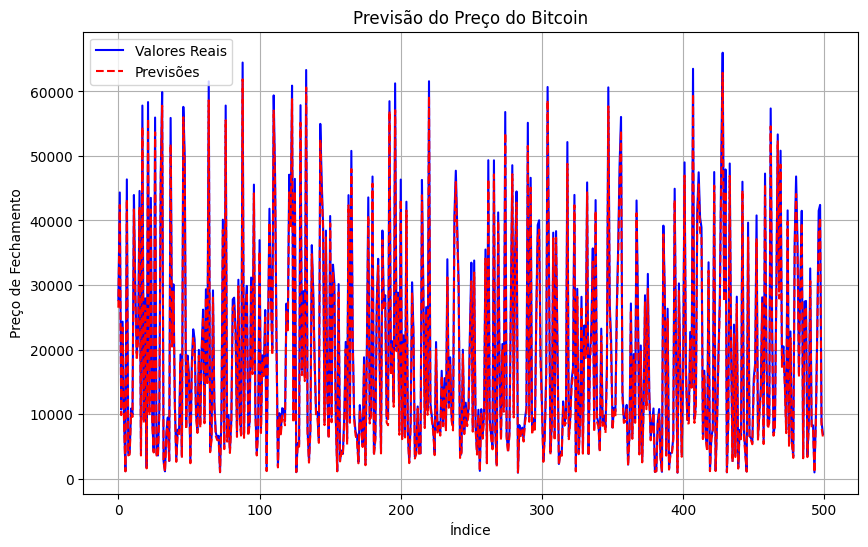

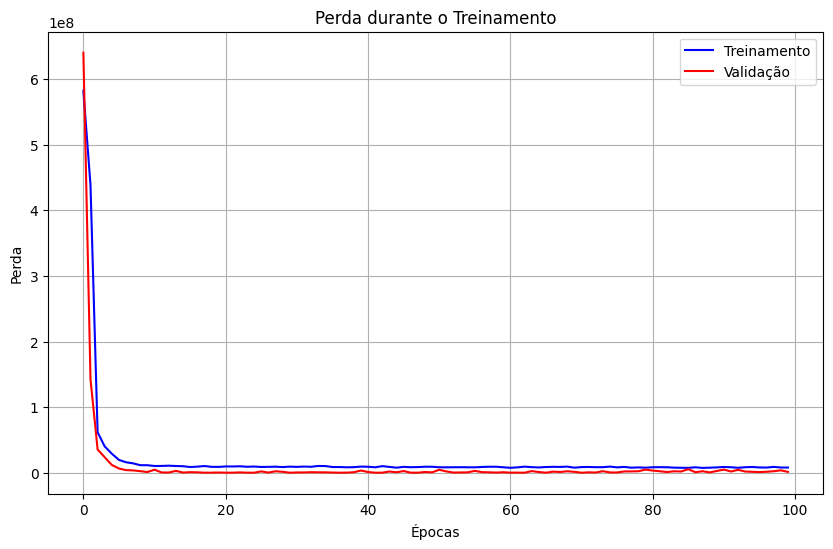

MAE: 970.7792, R²: 0.9944
Preço Real vs Previsão (30 Primeiras):
Preço Real: 27658.78, Previsão: 26482.77, Diferença: 1176.01
Preço Real: 44338.80, Previsão: 42394.43, Diferença: 1944.37
Preço Real: 10701.69, Previsão: 9845.55, Diferença: 856.15
Preço Real: 24327.64, Previsão: 23406.83, Diferença: 920.82
Preço Real: 9277.97, Previsão: 8724.16, Diferença: 553.81
Preço Real: 1165.20, Previsão: 1125.46, Diferença: 39.74
Preço Real: 46365.40, Previsão: 43281.48, Diferença: 3083.92
Preço Real: 3924.37, Previsão: 3599.12, Diferença: 325.25
Preço Real: 4022.17, Previsão: 3742.36, Diferença: 279.81
Preço Real: 10855.37, Previsão: 10158.60, Diferença: 696.77
Preço Real: 9888.61, Previsão: 9560.68, Diferença: 327.93
Preço Real: 43949.10, Previsão: 41716.23, Diferença: 2232.87
Preço Real: 29356.92, Previsão: 28193.40, Diferença: 1163.52
Preço Real: 19417.08, Previsão: 18368.08, Diferença: 1049.00
Preço Real: 22465.48, Previsão: 21431.58, Diferença: 1033.90
Preço Real: 44575.20, Previsão: 42092.49

In [15]:
# 4. Avaliar e Visualizar os Resultados
# Previsões no conjunto de teste
predicted = model.predict(X_test).flatten()  # Previsões e achatamento para 1D

# Cálculo das métricas
mae = mean_absolute_error(y_test.numpy(), predicted)
r2 = r2_score(y_test.numpy(), predicted)

# Plotar resultados
plt.figure(figsize=(10, 6))
plt.plot(y_test.numpy(), label='Valores Reais', color='blue')
plt.plot(predicted, label='Previsões', color='red', linestyle='--')
plt.title('Previsão do Preço do Bitcoin')
plt.xlabel('Índice')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)
plt.show()

# Plotar perda durante o treinamento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Treinamento', color='blue')
plt.plot(history.history['val_loss'], label='Validação', color='red')
plt.title('Perda durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)
plt.show()

# Printar métricas
print(f'MAE: {mae:.4f}, R²: {r2:.4f}')

# Printar algumas previsões
num_previsoes = 30  # Número de previsões a serem exibidas
print("Preço Real vs Previsão (30 Primeiras):")
for real, pred in zip(y_test.numpy()[:num_previsoes], predicted[:num_previsoes]):
    preco_real = real
    previsao = pred
    dif = preco_real - previsao  # Calcular a diferença
    print(f'Preço Real: {preco_real:.2f}, Previsão: {previsao:.2f}, Diferença: {dif:.2f}')


## 5. Avaliar o Modelo com Novos Dados

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MAE (Novos Dados): 2243.9563, R² (Novos Dados): 0.9537


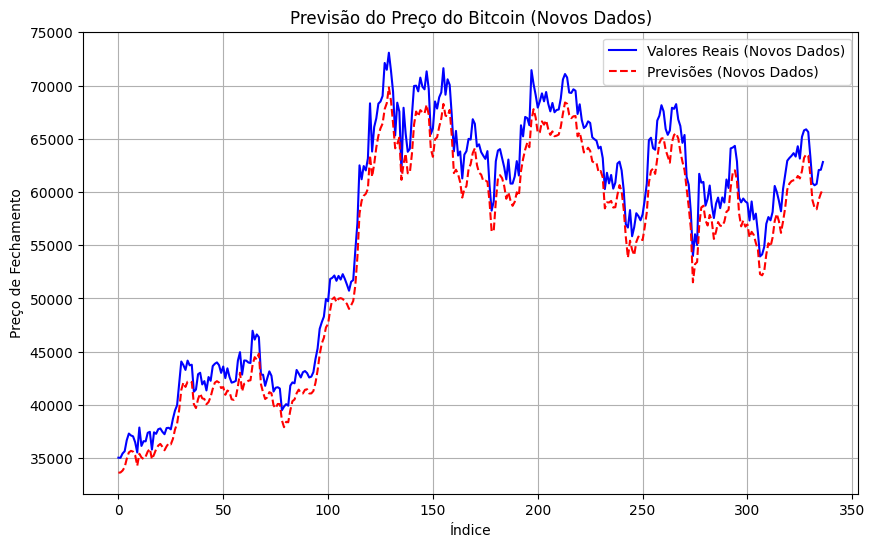

In [16]:
# 5. Avaliar o Modelo com Novos Dados
new_data = pd.read_csv('datasetteste.csv')  # Substitua pelo nome do arquivo carregado
new_features = new_data[['Open', 'High', 'Low', 'Close', 'Volume']].values
new_labels = new_data['Close'].values

# Normalizar os novos dados
new_features = scaler.transform(new_features)

# Converter para tensor
X_new = tf.convert_to_tensor(new_features, dtype=tf.float32)
y_new = tf.convert_to_tensor(new_labels, dtype=tf.float32)

# Carregar os pesos salvos
model.load_weights('bitcoin_price_predictor.weights.h5')  # Carrega os pesos salvos

# Avaliar o modelo com novos dados
new_predicted = model.predict(X_new).flatten()  # Previsões e achatamento para 1D

# Calcular as métricas para novos dados
new_mae = mean_absolute_error(y_new.numpy(), new_predicted)
new_r2 = r2_score(y_new.numpy(), new_predicted)

# Printar métricas para novos dados
print(f'MAE (Novos Dados): {new_mae:.4f}, R² (Novos Dados): {new_r2:.4f}')

# Plotar resultados para novos dados
plt.figure(figsize=(10, 6))
plt.plot(y_new.numpy(), label='Valores Reais (Novos Dados)', color='blue')
plt.plot(new_predicted, label='Previsões (Novos Dados)', color='red', linestyle='--')
plt.title('Previsão do Preço do Bitcoin (Novos Dados)')
plt.xlabel('Índice')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)
plt.show()
